# Working with complicated dataset

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [ ]:
import pandas as pd

link = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv'

cols = ['query acc.ver', 'subject acc.ver','% identity',
        'alignment length', 'mismatches', 'gap opens',
        'q.start', 'q.end', 's.start', 's.end', 'evalue',
        'bit score', '% positives', 'bonds', 'publications']

df = pd.read_csv(link,
                      na_values=['-', ' '],
                      skiprows=7,
                      names= cols,
                      usecols=cols,
                      thousands=",",
                      dtype={"publications": 'Int64'}
                     )
df.head()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q.start,q.end,s.start,s.end,evalue,bit score,% positives,bonds,publications
0,YP_220550.1,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9
1,YP_220550.1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47
2,YP_220550.1,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13
3,YP_220550.1,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41
4,YP_220550.1,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3


### Question 2
What is the average number of publications?

In [ ]:
df.publications.mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [ ]:
df[df.bonds > 15000]['subject acc.ver']

1         AGK29621.1
4         AHG32084.1
6             6G2J_H
12    YP_002791042.1
17        AGK29634.1
18          0806162F
21    YP_009112408.1
22    YP_001876469.1
24    YP_009092269.1
25        AHG32149.1
26    YP_009092074.1
27    YP_009450474.1
30    YP_004123270.1
31    YP_009092073.1
32        AHZ60901.1
40    YP_004123350.1
42    YP_009453754.1
44        ADD46492.1
46    YP_007025968.1
50    YP_009453806.1
52    YP_007024956.1
58        ASM92364.1
62    YP_006073044.1
63        ASM92494.1
64        ADG95699.1
68    YP_004891275.1
72    YP_009166014.1
82    YP_009538416.1
84    YP_009414182.1
85    YP_009178854.1
87    YP_009414415.1
89    YP_009353908.1
92    YP_009093743.1
95        ABX45285.1
97    YP_009414156.1
98    YP_009414363.1
Name: subject acc.ver, dtype: object

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.83, 0.05, 'Correlation coefficient: 0.97')

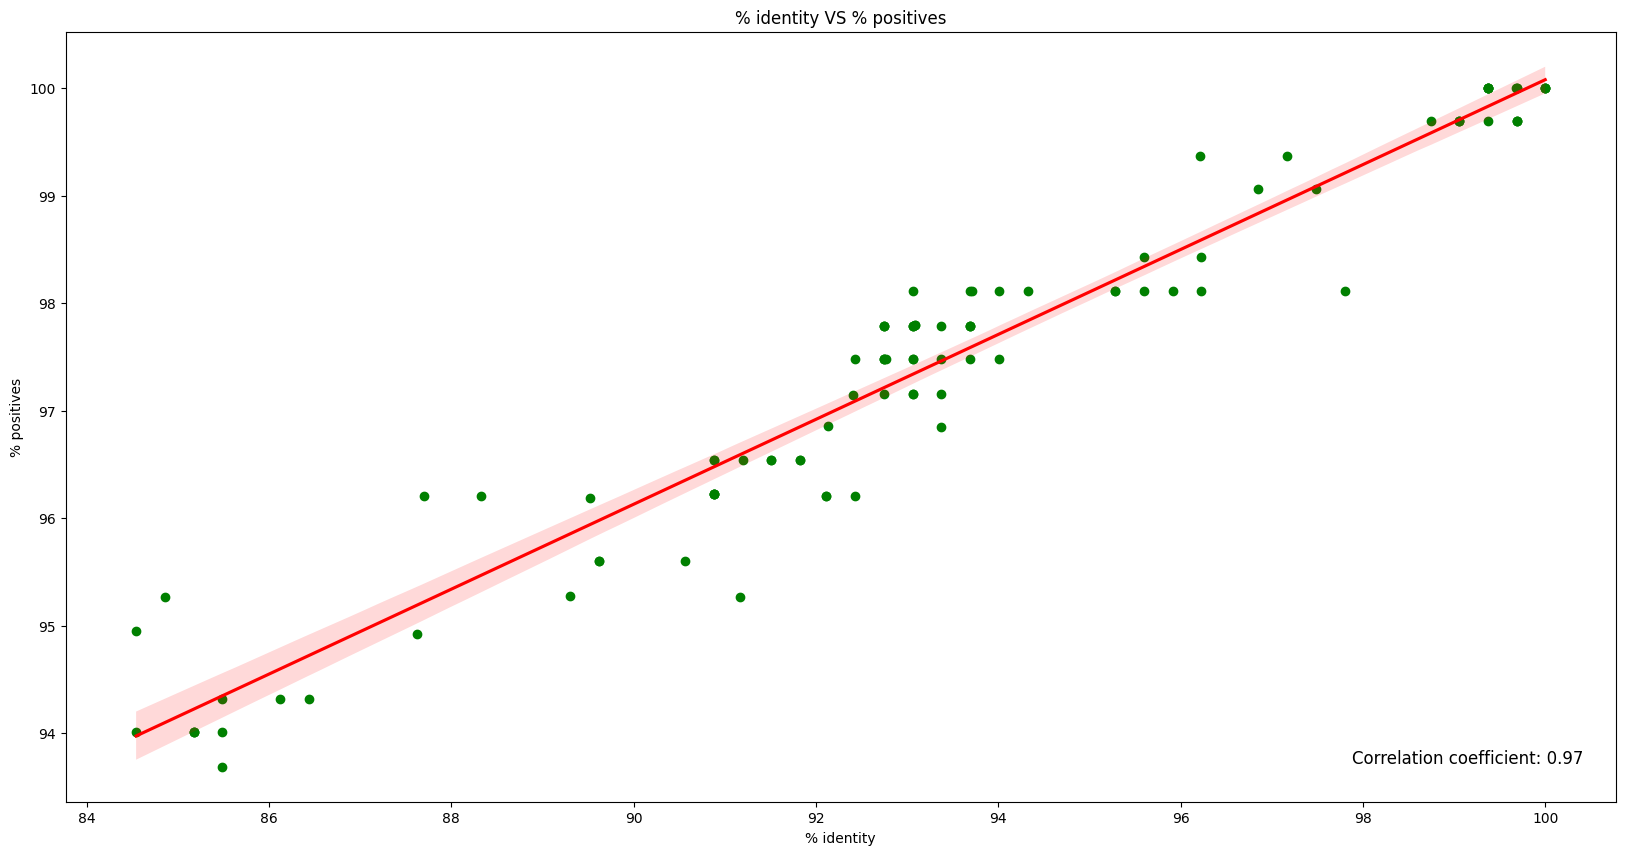

In [ ]:
plt.figure(figsize=(20, 10))

corr_coef = df['% identity'].corr(df['% positives'])

sns.regplot(data=df,
            x = '% identity',
            y = '% positives',
            ci=95,
            marker="o",
            scatter_kws = {"color": "green", "alpha": 1},
            line_kws=dict(color="r")
)

plt.title('% identity VS % positives')

plt.text(x=0.83, y=0.05, s=f'Correlation coefficient: {corr_coef:.2f}',
         fontsize=12, transform=plt.gca().transAxes)

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [ ]:
df_protein = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv')

In [ ]:
df = df.merge(df_protein, how='outer', left_on="subject acc.ver", right_on="Protein").drop(['Unnamed: 0', 'Protein'], axis = 1)
df.rename(columns={'Source': 'Protein source'}, inplace=True)
df.head()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q.start,q.end,s.start,s.end,evalue,bit score,% positives,bonds,publications,Protein source
0,YP_220550.1,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9,RefSeq
1,YP_220550.1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47,NaN
2,YP_220550.1,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13,GenPept
3,YP_220550.1,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41,NaN
4,YP_220550.1,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3,NaN
